**Importing The required python packages**

In [134]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

#  Reading & Loading data sets 

In [136]:
Email_data = pd.read_csv("spam.csv")
Email_data .head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploring the data set

In [137]:
Email_data.shape

(5572, 2)

In [138]:
Email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [139]:
Email_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [140]:
Email_data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

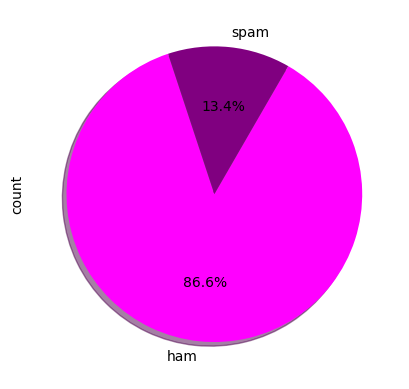

In [141]:
colors = ["magenta",  "purple"]
Email_data.Category.value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show()

In [142]:
Email_data.isnull().value_counts()

Category  Message
False     False      5572
Name: count, dtype: int64

In [143]:
df=Email_data.copy()

In [144]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preparation-Pre-processing text data


###  Remove punctuation , tokenize, remove stopwords, and stem

In [145]:
import string
string.punctuation
ps = nltk.PorterStemmer()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_En = nltk.corpus.stopwords.words('english')

In [146]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df['cleaned_text'] = df['Message'].apply(lambda x: clean_text(x))

In [147]:
df.head()

,Category,Message,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


### Vectorizing Data: TF-IDF

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])
features_tfidf.shape
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_tfidf




Sparse Matrix :
   (0, 7640)	0.19455055929986295
  (0, 1143)	0.3502103023764149
  (0, 3362)	0.1625113243443846
  (0, 2011)	0.2958590786430112
  (0, 1733)	0.33431358850024145
  (0, 4234)	0.2958590786430112
  (0, 7844)	0.23799450982015485
  (0, 3399)	0.19492218407727954
  (0, 1735)	0.2958590786430112
  (0, 1332)	0.26630661054973115
  (0, 2229)	0.27121377181119205
  (0, 5579)	0.23913099868302934
  (0, 4090)	0.3502103023764149
  (0, 3310)	0.1406644195549338
  (1, 5237)	0.5633498837724461
  (1, 7756)	0.44483654514496557
  (1, 4056)	0.4773478663822099
  (1, 4269)	0.42081977871680865
  (1, 5207)	0.2825014776211812
  (2, 71)	0.23441520469862814
  (2, 1215)	0.16767473394527968
  (2, 5862)	0.23441520469862814
  (2, 7338)	0.12408474860231786
  (2, 5816)	0.23441520469862814
  (2, 5904)	0.16121883187604838
  :	:
  (5568, 2808)	0.6620790748934324
  (5568, 3113)	0.5770406346252941
  (5568, 3658)	0.3753220393700477
  (5568, 3310)	0.2963254483546816
  (5569, 6516)	0.5375461940984255
  (5569, 5516)	0.53

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering

###  Create feature for the message length & feature for percent of text that is punctuation 

In [149]:
df['body_len'] = df['Message'].apply(lambda x: len(x)-x.count(' ') )
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round( count/(len(text) - text.count(" ")),3)*100
df['body_len'] = df['Message'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['Message'].apply(lambda x: count_punct(x))

df.head()

,Category,Message,cleaned_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1


### Create feature for The percent of characters in capital letters

In [150]:
def count_Cap(text):
    count = sum([1 for char in text if char.isupper()])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['Message'].apply(lambda x: len(x) - x.count(" "))
df['cap%'] = df['Message'].apply(lambda x: count_Cap(x))
df.head()

,Category,Message,cleaned_text,body_len,punct%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1,4.1


In [151]:
df.describe()

,body_len,punct%,cap%
count,5572.000000,5572.000000,5572.000000
mean,65.707645,7.115363,7.980922
std,48.800056,6.652073,13.389163
min,2.000000,0.000000,0.000000
25%,29.000000,3.300000,3.100000
50%,50.000000,5.500000,4.500000
75%,99.000000,9.100000,7.400000
max,740.000000,100.000000,100.000000


# Data Transformation 

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['body_len','punct%','cap%']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [153]:
df['Category']  = df['Category'].apply(lambda x : 1 if x=='spam' else 0)
#1 spam 0 Not

In [154]:
df.head()

,Category,Message,cleaned_text,body_len,punct%,cap%
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.121951,0.098,0.033
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.029810,0.250,0.083
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.170732,0.047,0.078
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.050136,0.154,0.051
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.063686,0.041,0.041


#  Model Building

In [155]:
y= df['Category']

final_df=df.drop(['Category', 'Message', 'cleaned_text'], axis=1)

In [156]:
features_tfidf.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
final_df = pd.concat([final_df, pd.DataFrame(features_tfidf)], axis=1)


In [158]:
final_df.head()


,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
## Handle Imbalanced 
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(final_df, y)

## Split Training and Testing Data Sets

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


## Compare Models

In [161]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


Training and evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:


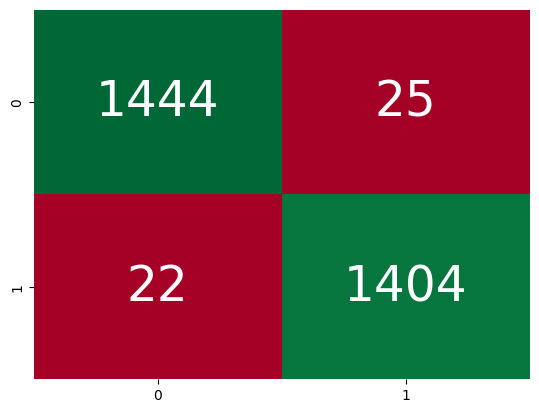

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1469
           1       0.98      0.98      0.98      1426

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895


Training and evaluating Random Forest...
Confusion Matrix for Random Forest:


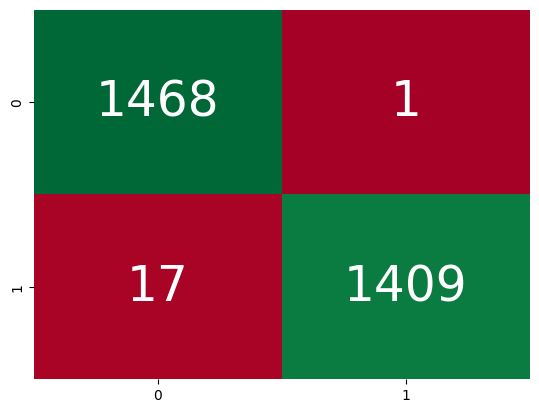

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1469
           1       1.00      0.99      0.99      1426

    accuracy                           0.99      2895
   macro avg       0.99      0.99      0.99      2895
weighted avg       0.99      0.99      0.99      2895


Training and evaluating AdaBoost...


C:\Users\sondo\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix for AdaBoost:


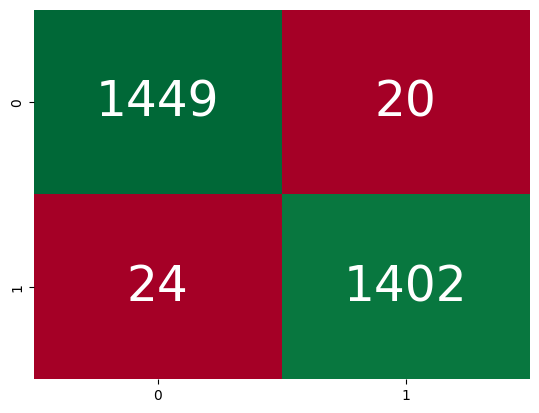

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1469
           1       0.99      0.98      0.98      1426

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895


Training and evaluating K-Nearest Neighbors...
Confusion Matrix for K-Nearest Neighbors:


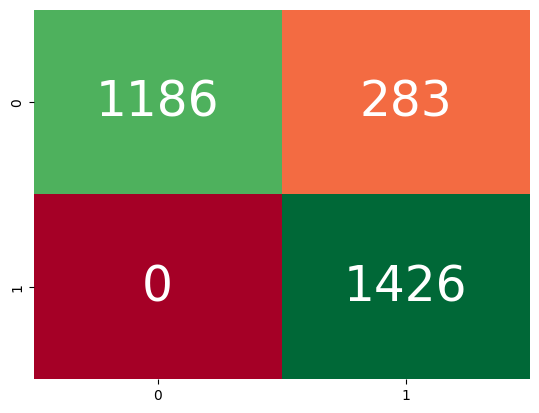

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1469
           1       0.83      1.00      0.91      1426

    accuracy                           0.90      2895
   macro avg       0.92      0.90      0.90      2895
weighted avg       0.92      0.90      0.90      2895



In [163]:
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Confusion Matrix for {name}:")
    cm =confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm, annot=True,cbar=False,fmt="d",cmap="RdYlGn",annot_kws={"size": 35})
    plt.show()
    
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
